# Machine Learning

In machine learning, we do things like find *similar things* (cluster), *classify*, *predict*, *generate*, and more. 

Humans are really good a finding patterns. Even from a young age, they can group together items that are similar. Grouping similar things is an essential step in learning concepts, even before language comes into play. Today we'll learn about finding and grouping similar things, called *clustering*.

# In Daily Life...

Machine learning today has taken off thanks to the large amounts of data available, thanks to the internet. One example includes Netflix being able to suggest new shows that you might like. 

Let's explore this idea more. The main concept behind it is that you might like things that are similar to what you already like. This has some caveats (we'll talk about it in the Ethics for AI section), but it is behind much of the technology we have around us today.

# Let's talk about music.

Imagine that we want to make an AI program that suggests new song that you might like. Let's say you are interested in discovering songs that you like from other countries, or in other languages.

But how do you quantify or measure what you like? Could you even describe it?

Let's explore the Spotify Dataset 2017 songs of 2017 to learn how an algorithm to suggest new songs might work.

Consider this dataset:

In [ ]:
import pandas
data = pandas.read_csv('data/spotify.csv')  # Top 2017 songs of 2017 from kaggle.com
print data

# 1. Features

In this dataset of 2017 songs, you will see that, alongside every song title, there are many characteristics or **features** extracted for each song. These features include numerical information like tempo, acousticness, etc.

In [ ]:
print data["tempo"]

Imagine that you were to search this entire database for a song that you might like. Some features will be useful for finding similar songs. Which features do you think would be most useful? Least useful?

## 1.1 What we can do with Features

## Finding Clusters of Similar Things

A machine learning technique called **clustering** can help us:

- visualize our data, and
- find groups of similar items.

We'll use a dataset to suggest songs that are similar to our favourite song. For the sake of this example, let's say that we like the song "Mask Off" by "Future" and would like to find songs that are similar. Let's just look at 2 features for now.

In [ ]:
import pandas
raw_data = pandas.read_csv('data/spotify.csv')  # Top 2017 songs of 2017 from kaggle.com

# Just get the columns we want
dataset = pandas.DataFrame(raw_data, columns = ['tempo', 'acousticness', 'song_title', 'artist'])

# Let's just get the top 20 songs
dataset = dataset[:20]

# Display the dataset
dataset

## I want to find songs with a similar tempo!

Let's start by thinking about how to find similar songs if you only know one thing about each song, e.g. tempo. 
We'll compare each song to Mask Off.

Let's add a new column that finds the differences in tempo from the top song, Mask Off (tempo=150.062)


In [ ]:
# Add a column tempo_difference. 150.062 refers to Mask Off's tempo
dataset['tempo_difference'] = abs(150.062 - dataset.tempo)
dataset

## Let's visualize that

In [ ]:
# Now let's visualize that 
import matplotlib.pyplot as plot

plot.scatter(dataset['tempo_difference'], dataset['song_title'])
plot.xlabel('Difference in Tempo')
plot.show()

## Now let's find how different they are in terms of acousticness!

In [ ]:
# Add a new column that finds the differences in acousticness from top song, Mask Off (acousticness=0.01020)

dataset['acoustic_difference'] = abs(0.01020 - dataset.acousticness)
dataset

In [ ]:
# Now let's visualize that with a histogram
import matplotlib.pyplot as plot

plot.scatter(dataset['acoustic_difference'], dataset['song_title'])

plot.xlabel('Difference in Acousticness')
plot.show()

## Perceptually Similar Songs

If we manually look at which song looked the closest over both **tempo** and **acousticness** to Mask Off, we get ________________. 


Did you make your guess? Let's see if that sounds right! 
    
    https://youtu.be/CGt-rTDkMcM
    
    https://youtu.be/xvZqHgFz51I
    

## Visualizing The Songs in 2D Space

We can also visualize the two features simultaneously in a 2D plot, like this.

In [ ]:
# Now let's visualize that by plotting all the original data points
import matplotlib.pyplot as plot
plot.rcParams["figure.figsize"] = 10,10

plot.scatter(dataset['tempo'], dataset['acousticness'])
plot.xlabel('Tempo')
plot.ylabel('Acousticness')

for index, row in dataset.iterrows():
    plot.annotate(unicode(row['song_title'], 'utf-8'), xy=(row['tempo'], row['acousticness']))

# Calculating Distance in 2D Space

And now that we plot the songs in 2D space, we can properly calculate the distances in 2D mathematically, using the **Euclidean distance** function.

In [ ]:
import numpy
dataset['euclidean_distance'] = numpy.sqrt( (0.01020 - dataset.acousticness)**2 + (150.062 - dataset.tempo)**2)

# Sort the dataset
sorted_dataset_distance = dataset.sort_values('euclidean_distance')

# Display sorted dataset
sorted_dataset_distance

# Interesting...

In the last plot above, it suddenly looks like **I've Seen Footage** is really *close* to Mask Off, and **One Night** is really *far* from Mask Off. But in our calculations of Euclidean distance above, both are ~20 units away from **Mask Off**. Can you guess what's wrong?

When we calculated the distance, the tempo was on a scale of 100's, while the acousticness was on a scale from 0 to 1. This means that the distance in tempo completely overshadowed the minute differences in acousticness.

So, we need to make them both on the same ___. 

## Scaling Data

Also known as *normalizing* or standardizing data, we should scale our data to make our comparisons fair. 

In [9]:
# Scale data to [0,1]
from sklearn.preprocessing import MinMaxScaler

# Scale tempo to [0,1]
tempo_column = dataset[['tempo']].values.astype(float)
tempo_scaler = MinMaxScaler().fit(tempo_column)
tempo_scaled = tempo_scaler.transform(tempo_column)
dataset['tempo_normalized'] = pandas.DataFrame(tempo_scaled)

# Scale acousticness to [0,1] (just in case)
acoustic_column = dataset[['acousticness']].values.astype(float)
acoustic_scaler = MinMaxScaler().fit(acoustic_column)
acousticness_scaled = acoustic_scaler.transform(acoustic_column)
dataset['acoustic_normalized'] = pandas.DataFrame(acousticness_scaled)

dataset


,tempo,acousticness,song_title,artist,tempo_normalized,acoustic_normalized,norm_euclidean_distance
0,150.062,0.010200,Mask Off,Future,0.748899,0.011762,0.929496
1,160.083,0.199000,Redbone,Childish Gambino,0.846361,0.232618,1.096575
2,75.044,0.034400,Xanny Family,Future,0.019286,0.040071,1.439104
3,86.468,0.604000,Master Of None,Beach House,0.130394,0.706383,1.845443
4,174.004,0.180000,Parallel Lines,Junior Boys,0.981754,0.210392,1.041557
5,85.023,0.004790,Sneakin’,Drake,0.116340,0.005434,1.340718
6,80.030,0.014500,Childs Play,Drake,0.067779,0.016792,1.386281
7,144.154,0.020200,Gyöngyhajú lány,Omega,0.691438,0.023460,0.967514
8,130.035,0.048100,I've Seen Footage,Death Grips,0.554119,0.056097,1.069766
9,99.994,0.002080,Digital Animal,Honey Claws,0.261946,0.002264,1.226443


In [10]:
# Now calculate the distances again using these normalized values
dataset['norm_euclidean_distance'] = numpy.sqrt( (0.011762 - dataset.acoustic_normalized)**2 
                                                + (0.748899 - dataset.tempo_normalized)**2)

# Sort the dataset from closest to farthest
sorted_dataset_distance = dataset.sort_values('norm_euclidean_distance')

# Display sorted dataset
sorted_dataset_distance

,tempo,acousticness,song_title,artist,tempo_normalized,acoustic_normalized,norm_euclidean_distance
0,150.062,0.010200,Mask Off,Future,0.748899,0.011762,5.048807e-07
58,148.040,0.017400,Dopeman,Vince Staples,0.729233,0.020185,2.139384e-02
41,147.028,0.003560,I Don't Sell Molly No More,ILoveMakonnen,0.719390,0.003995,3.051372e-02
33,146.923,0.032400,Hercules,Young Thug,0.718369,0.037732,4.008101e-02
82,154.008,0.024900,Hot Blur,How Sad,0.787277,0.028958,4.205416e-02
7,144.154,0.020200,Gyöngyhajú lány,Omega,0.691438,0.023460,5.863934e-02
88,158.859,0.022100,Dadje Von O Von Non,Gnonnas Pédro,0.834457,0.025683,8.668276e-02
37,142.065,0.056500,Jumpman,Drake,0.671121,0.065923,9.477798e-02
42,139.940,0.001560,Versace Python,Riff Raff,0.650454,0.001655,9.896273e-02
23,138.022,0.000596,Girlfriend,Ty Segall,0.631800,0.000528,1.176371e-01


Now we can see the closest songs are different! Which are the most similar songs to Mask Off?

# Visualizing Our Data

We can start to see our data and notice that there are songs that are similar to Mask Off, but also very different! 

In [ ]:
# Now let's visualize that by plotting all the original data points
import matplotlib.pyplot as plot
plot.rcParams["figure.figsize"] = 10,10

plot.scatter(dataset['tempo_normalized'], dataset['acoustic_normalized'])
plot.xlabel('Tempo')
plot.ylabel('Acousticness')

plot.axis('equal')

for index, row in dataset.iterrows():
    plot.annotate(unicode(row['song_title'], 'utf-8'), xy=(row['tempo_normalized'], row['acoustic_normalized']))

Let's finish by visualizing even more songs from our database.

# Summary

Let's put everything together!

**1. Pre-processing**
- Reading the file
- Getting the columns (features) we want
- Choosing the rows (songs) we want
- Scaling the features to [0,1]

**2. Visualizing Data in Feature Space**
- Plotting the songs in 2D space

**3. Calculating Differences and Similarities**
- Calculating distances and sorting them to find the most similar songs

In [1]:
import pandas
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plot

# Read the data from the spreadsheet
raw_data = pandas.read_csv('data/spotify.csv')  # Top 2017 songs of 2017 from kaggle.com

# Just get the columns we want
dataset = pandas.DataFrame(raw_data, columns = ['tempo', 'acousticness', 'song_title', 'artist'])

# Let's get the top 100 songs
dataset = dataset[:100]

# Scale tempo to [0,1]
tempo_column = dataset[['tempo']].values.astype(float)
tempo_scaler = MinMaxScaler().fit(tempo_column)
tempo_scaled = tempo_scaler.transform(tempo_column)
dataset['tempo_normalized'] = pandas.DataFrame(tempo_scaled)

# Scale acousticness to [0,1] (just in case)
acoustic_column = dataset[['acousticness']].values.astype(float)
acoustic_scaler = MinMaxScaler().fit(acoustic_column)
acousticness_scaled = acoustic_scaler.transform(acoustic_column)
dataset['acoustic_normalized'] = pandas.DataFrame(acousticness_scaled)\

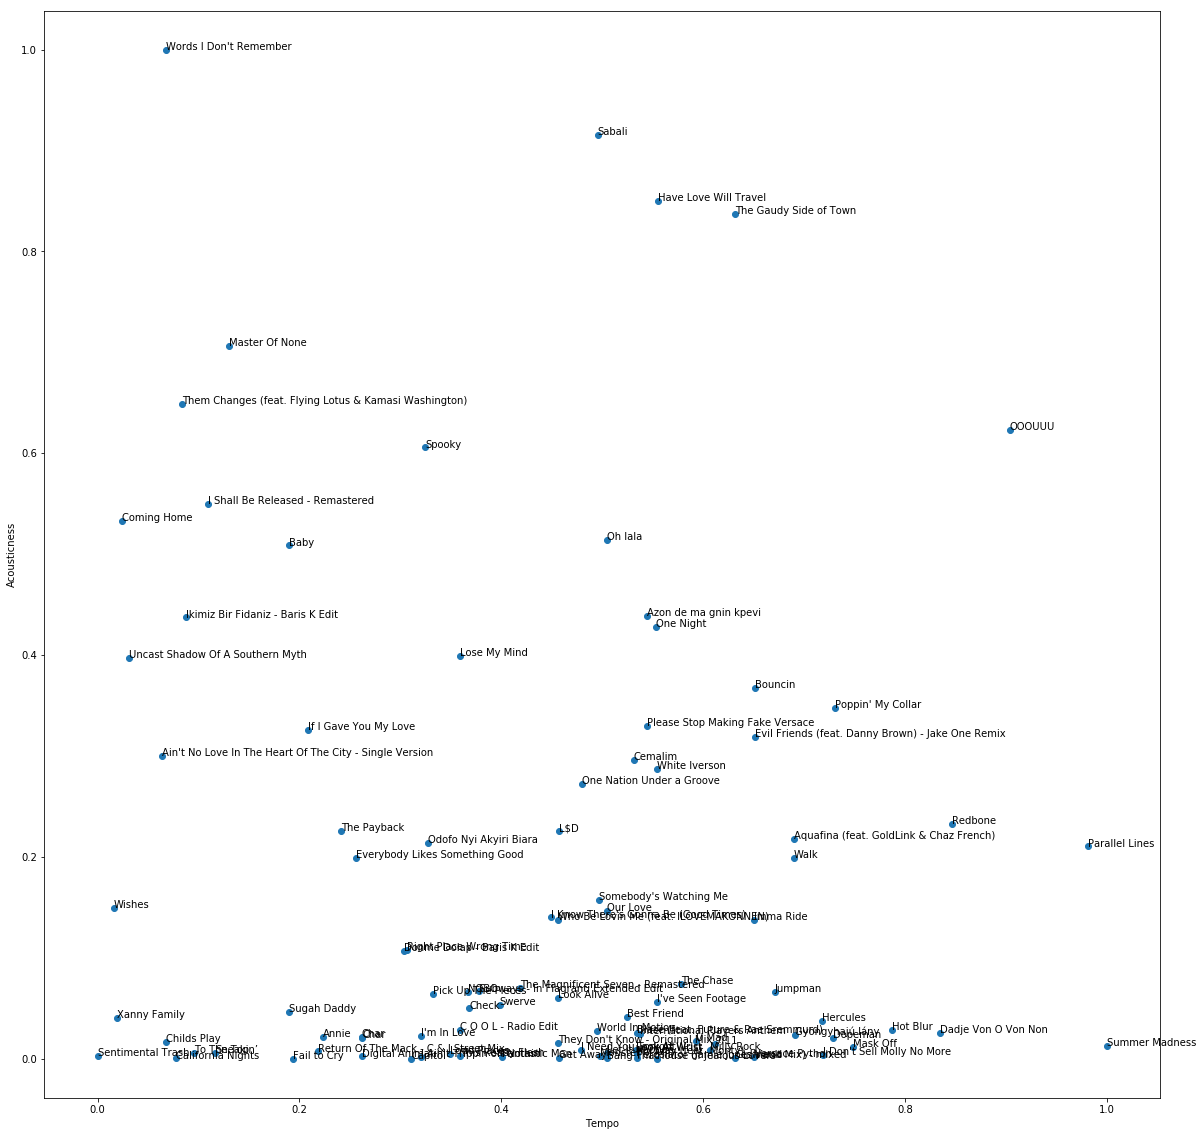

In [2]:
# Now let's visualize that by plotting all the original data points
plot.rcParams["figure.figsize"] = 20,20

plot.scatter(dataset['tempo_normalized'], dataset['acoustic_normalized'])
plot.xlabel('Tempo')
plot.ylabel('Acousticness')

plot.axis('equal')

for index, row in dataset.iterrows():
    plot.annotate(unicode(row['song_title'], 'utf-8'), xy=(row['tempo_normalized'], row['acoustic_normalized']))

In [11]:
# Now calculate the distances again using these normalized values
import numpy
dataset['norm_euclidean_distance'] = numpy.sqrt( (0.011762 - dataset.acoustic_normalized)**2 
                                                + (0.748899 - dataset.tempo_normalized)**2)
# Sort the dataset from closest to farthest
sorted_dataset_distance = dataset.sort_values('norm_euclidean_distance')

# Display sorted dataset
sorted_dataset_distance

,tempo,acousticness,song_title,artist,tempo_normalized,acoustic_normalized,norm_euclidean_distance
0,150.062,0.010200,Mask Off,Future,0.748899,0.011762,5.048807e-07
58,148.040,0.017400,Dopeman,Vince Staples,0.729233,0.020185,2.139384e-02
41,147.028,0.003560,I Don't Sell Molly No More,ILoveMakonnen,0.719390,0.003995,3.051372e-02
33,146.923,0.032400,Hercules,Young Thug,0.718369,0.037732,4.008101e-02
82,154.008,0.024900,Hot Blur,How Sad,0.787277,0.028958,4.205416e-02
7,144.154,0.020200,Gyöngyhajú lány,Omega,0.691438,0.023460,5.863934e-02
88,158.859,0.022100,Dadje Von O Von Non,Gnonnas Pédro,0.834457,0.025683,8.668276e-02
37,142.065,0.056500,Jumpman,Drake,0.671121,0.065923,9.477798e-02
42,139.940,0.001560,Versace Python,Riff Raff,0.650454,0.001655,9.896273e-02
23,138.022,0.000596,Girlfriend,Ty Segall,0.631800,0.000528,1.176371e-01


# Your Turn!

Play with this a little bit -- find a song you like, 
and change the code above to find other songs in the top 100 songs that you might also like!

What can you say about the songs now that you've visualized it?

Can you try to add another feature? How would you modify the Euclidean Distance to accomodate another feature

# Discussion - Ethics and Bias in AI

What do you think about how features are chosen? Are all features equally important? Who chooses the features to use?